In [225]:
# CAB FARE PREDICTION PROJECT

In [226]:
#Importing Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [227]:
#Setting working directory
os.chdir("D:\CabFarePrediction\InputFiles")

In [228]:
os.getcwd()

'D:\\CabFarePrediction\\InputFiles'

In [229]:
#Loading the training data
cabfare_train = pd.read_csv("train_cab.csv",sep = ",")

In [230]:
cabfare_train.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [231]:
#Loading TestData
cabfare_test = pd.read_csv("test.csv" , sep = ",")

In [232]:
cabfare_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [233]:
#Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. Pandas in python provide an interesting method describe(). The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture

In [234]:
cabfare_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [235]:
cabfare_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [236]:
cabfare_train.shape

(16067, 7)

In [237]:
#value_counts() which can get count of each category in a categorical attributed series of values.

#Converting the varibales into proper Datatypes

In [238]:
cabfare_train['fare_amount'] = pd.to_numeric(cabfare_train['fare_amount'], errors='coerce')
cabfare_train['pickup_datetime'] = pd.to_datetime(cabfare_train['pickup_datetime'], errors='coerce')

In [239]:
#Stripping the pickup_datetime variable into year,month,day,hours,weekday
cabfare_train['pickup_datetime'] = pd.to_datetime(cabfare_train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z',
                                               errors='coerce')


In [240]:
cabfare_train['pickup_month'] = cabfare_train['pickup_datetime'].dt.month
cabfare_train['pickup_year'] = cabfare_train['pickup_datetime'].dt.year
cabfare_train['pickup_day'] = cabfare_train['pickup_datetime'].dt.day
cabfare_train['pickup_weekday'] = cabfare_train['pickup_datetime'].dt.weekday
cabfare_train['pickup_hour'] = cabfare_train['pickup_datetime'].dt.hour

In [241]:
cabfare_train = cabfare_train.drop('pickup_datetime',axis = 1)

In [242]:
cabfare_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
pickup_month         float64
pickup_year          float64
pickup_day           float64
pickup_weekday       float64
pickup_hour          float64
dtype: object

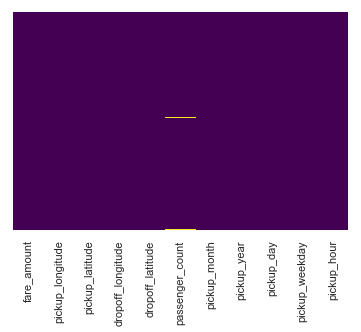

In [243]:
sns.heatmap(cabfare_train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# MISSING VALUE ANALYSIS

In [244]:
def check_missing_values(training_dataset):
    missing_obs = pd.DataFrame(training_dataset.isnull().sum())
    missing_obs = missing_obs.reset_index()
    missing_obs = missing_obs.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
    missing_obs['Missing_percentage'] = (missing_obs['Missing_percentage']/len(training_dataset))*100
    print(missing_obs.head(10))
    return

In [245]:
check_missing_values(cabfare_train)

           Variables  Missing_percentage
0        fare_amount            0.155598
1   pickup_longitude            0.000000
2    pickup_latitude            0.000000
3  dropoff_longitude            0.000000
4   dropoff_latitude            0.000000
5    passenger_count            0.342317
6       pickup_month            0.006224
7        pickup_year            0.006224
8         pickup_day            0.006224
9     pickup_weekday            0.006224


In [246]:
def drop_missing_values(training_dataset, columns_list):
    """
    Function to convert all 0s to np.nan & remove all the resulting NAs and already present NAs
    columns_list - list type
    """
    training_dataset = training_dataset.replace(0, np.nan)
    initial_n_rows = training_dataset.shape[0]
    for col in columns_list:
        training_dataset.dropna(subset=[col], inplace=True, axis='index')
    after_n_rows = training_dataset.shape[0]
    n_rows_removed = initial_n_rows - after_n_rows
    print("Number of Rows removed = " + str(n_rows_removed) + "\n")
    check_missing_values(training_dataset)
    return training_dataset

In [247]:
drop_missing_values(cabfare_train, cabfare_train.columns)

Number of Rows removed = 3067

           Variables  Missing_percentage
0        fare_amount                 0.0
1   pickup_longitude                 0.0
2    pickup_latitude                 0.0
3  dropoff_longitude                 0.0
4   dropoff_latitude                 0.0
5    passenger_count                 0.0
6       pickup_month                 0.0
7        pickup_year                 0.0
8         pickup_day                 0.0
9     pickup_weekday                 0.0


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,1.0,2010.0,5.0,1.0,16.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,2012.0,21.0,5.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,3.0,2010.0,9.0,1.0,7.0
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,1.0,2011.0,6.0,3.0,9.0
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.0,11.0,2012.0,20.0,1.0,20.0
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1.0,1.0,2012.0,4.0,2.0,17.0
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.0,9.0,2009.0,2.0,2.0,1.0
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1.0,4.0,2012.0,8.0,6.0,7.0
12,4.1,-73.991601,40.744712,-73.983081,40.744682,2.0,11.0,2009.0,6.0,4.0,1.0
13,7.0,-74.005360,40.728867,-74.008913,40.710907,1.0,7.0,2013.0,2.0,1.0,19.0


In [248]:
def box_plot(y_axis_cols_list, x_axis_data_list, subplot_nrows, subplot_ncols, plot_heading='Box plot'):
    """
    Plots boxplots for the columns in y_axis_cols_list & respective data in x_axis_data_list.
    Things to take care of:
    len(y_axis_cols_list) = len(x_axis_data_list) = subplot_ncols * subplot_nrows
    that means, if subplot_ncols = 6, subplot_nrows = 1, then the 
    number of columns for y_axis_cols_list & data in x_axis_data_list should be equal to 1*6 = 6
    y_axis_cols_list - string list
    x_axis_data_list - pandas dataframe list
    subplot_ncols, subplot_nrows - integer type
    """
    #Dividing the plotting area into subplots & storing the positions in ax matrix.
    #Each subplot can be accessed as indices of the matrix
    #Setting image size
    #plt.figure(figsize=(14,6))
    # squeeze = False parameter is being used because we are using only 1 row for subplots, so to avoid single axes indexing, squeeze = False
    fig, ax = plt.subplots(nrows = subplot_nrows, ncols = subplot_ncols, squeeze=False, figsize = (20,8))
    #Heading to the plot
    plot_title = plt.suptitle(plot_heading, fontsize = 'x-large')
    #Fits the plot into the specified figure size
    plt.tight_layout()
    #Plotting boxplots in the subplot area for each column
    for i in range(subplot_nrows):
        for j in range(subplot_ncols):
            list_index = subplot_ncols * i + j
            sns.boxplot(y=y_axis_cols_list[list_index], data=x_axis_data_list[list_index], ax=ax[i][j])
    fig.subplots_adjust(top = 0.9, right=0.9)
    plt.show()
    return

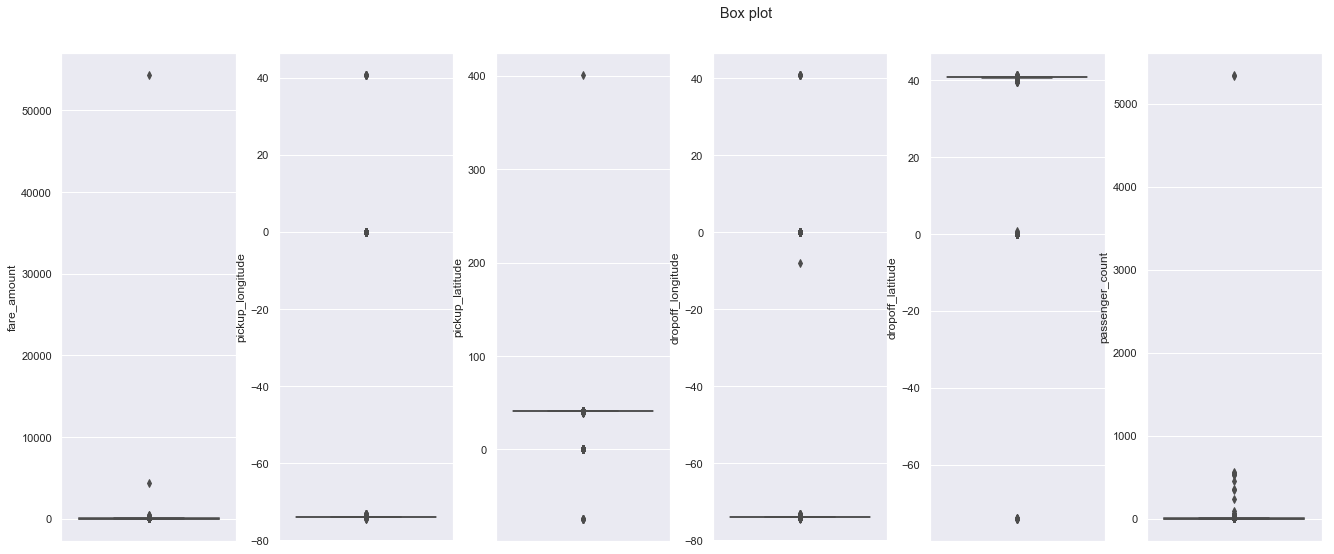

In [249]:
y_axis_cols_list = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
x_axis_data_list = [cabfare_train,cabfare_train,cabfare_train,cabfare_train,cabfare_train,cabfare_train]
box_plot(y_axis_cols_list=y_axis_cols_list, x_axis_data_list=x_axis_data_list, subplot_nrows=1, subplot_ncols=6)

In [250]:
cabfare_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000,16066.000000,16066.000000,16066.000000,16066.000000,16066.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070,6.260612,2011.730860,15.669862,3.032615,13.497821
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122,3.447727,1.864275,8.683210,1.968929,6.519985
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000,3.000000,2010.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000,6.000000,2012.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000,9.000000,2013.000000,23.000000,5.000000,19.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000,12.000000,2015.000000,31.000000,6.000000,23.000000


# OUTLIER ANALYSIS

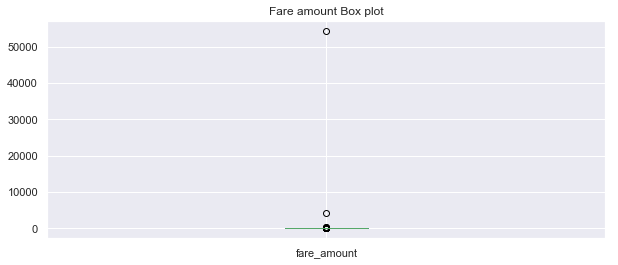

In [251]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,4))
cabfare_train['fare_amount'].plot(kind='box')
ax.set(title='Fare amount Box plot')
plt.savefig('Figure2.png')
plt.show()

In [252]:
cabfare_train.passenger_count.value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [253]:
cabfare_train.pickup_longitude.value_counts()

 0.000000     315
-73.137393     10
-73.985652      4
-73.981497      4
-73.991467      4
-73.989832      4
-73.967178      4
-73.975040      4
-73.981158      4
-73.952260      4
-73.994200      4
-73.977897      4
-73.988883      4
-73.986083      4
-73.988132      4
-73.995900      4
-73.991037      4
-73.991797      4
-73.982130      4
-73.976162      4
-73.995757      4
-73.978177      4
-73.982352      4
-73.971732      4
-74.004060      3
-73.982165      3
-73.983620      3
-74.006525      3
-73.991580      3
-73.990909      3
             ... 
-74.016055      1
-73.971217      1
-73.922409      1
-73.954823      1
-73.952912      1
-74.007398      1
-73.964585      1
-73.944576      1
-73.980164      1
-73.964589      1
-73.937673      1
-73.971018      1
-73.978265      1
-74.007287      1
-73.988604      1
-74.005567      1
-73.978075      1
-73.994883      1
-73.970632      1
-73.997040      1
-74.003448      1
-73.973533      1
-73.989357      1
-73.980720      1
-73.987404

In [254]:
#Creating a dataframe which contains the range of numerical variables
data_numeric = {
    'fare_amount' : [1, 100],
    'pickup_longitude' : [-74.8, -72.8],
    'pickup_latitude' : [39.45, 41.45],
    'dropoff_longitude' : [-74.8, -72.8],
    'dropoff_latitude' : [39.45, 41.45],
    'passenger_count' : [1, 6],
}
data_numeric = pd.DataFrame(data_numeric)

def assign_range(num, col_name):
    """
    Function to check if a given value is within the prescribed range of that column or not
    num - float or integer type
    col_name - string type
    """
    lower_range = data_numeric[col_name].loc[0]
    upper_range = data_numeric[col_name].loc[1]
    if num >= lower_range and num <= upper_range:
        return True
    return False

def remove_outliers(cols_list, test_data):
    """
    Function to remove the rows containing outlier values using manually stored range
    col_list - list of strings of columns names
    """
    initial_n_rows = test_data.shape[0]
    for col in cols_list:
        test_data = test_data[test_data[col].apply(lambda x: assign_range(x, col))]
    after_n_rows = test_data.shape[0]
    n_rows_removed = initial_n_rows - after_n_rows
    print("Number of Rows removed = " + str(n_rows_removed) + "\n")
    return test_data

def outlier_analysis(test_data):
    cdata = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
    test_data  = remove_outliers(cols_list=cdata,test_data=test_data)   
    return test_data

In [255]:
cabfare_train = outlier_analysis(cabfare_train)

Number of Rows removed = 502



In [256]:
cabfare_train.shape

(15565, 11)

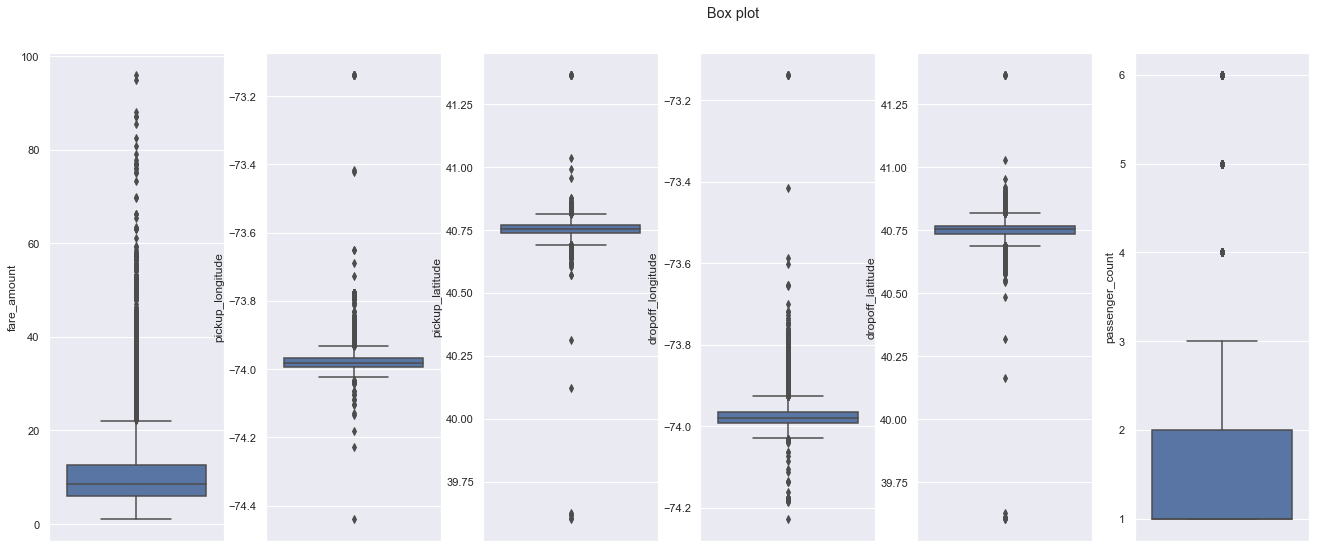

In [257]:
cdata = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']
x_axis_data_list = [cabfare_train,cabfare_train,cabfare_train,cabfare_train,cabfare_train,cabfare_train]
box_plot(y_axis_cols_list=cdata, x_axis_data_list = x_axis_data_list, subplot_nrows=1, subplot_ncols=6)

# FEATURE ENGINEERING

In [258]:
#GETTING THE ABSOLUTE LATITUDE AND LONGITUDE VALUES
cabfare_train["abs_latitude"] = cabfare_train['pickup_latitude'] - cabfare_train['dropoff_latitude']
cabfare_train["abs_longitude"] = cabfare_train['pickup_longitude'] - cabfare_train['dropoff_longitude']

In [259]:
#FUNCTION TO CALUCLATE DISTANCE FROM LATITUDE AND LONGITUDE USING greatcircledistance formula
def great_circle_distance(pick_latitude,pick_longitude,drop_latitude,drop_longitude):
    R = 6371000 # Approximate mean radius of earth (in m)
    
    # Convert decimal degrees to ridians
    pick_longitude,pick_latitude,drop_longitude,drop_latitude = map(np.radians, [pick_longitude,pick_latitude,drop_longitude,drop_latitude])
    
    # Distance of longitude and latitude in radians
    longitude_dist = drop_longitude - pick_longitude
    latitude_dist = drop_latitude - pick_latitude
    
    # Haversine implementation
    a = np.sin(latitude_dist/2)**2 + np.cos(pick_latitude) * np.cos(drop_latitude) * np.sin(longitude_dist/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dis_mtr = R*c # Distance in meters
    dis_kms = dis_mtr/1000 # Distance in km
    return dis_kms


cabfare_train['distance'] = great_circle_distance(cabfare_train.pickup_latitude,cabfare_train.pickup_longitude,cabfare_train.dropoff_latitude,cabfare_train.dropoff_longitude)

In [260]:
cabfare_train.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_latitude,abs_longitude,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,6.0,2009.0,15.0,0.0,17.0,0.009041,-0.002701,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,1.0,2010.0,5.0,1.0,16.0,-0.070701,-0.036780,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,8.0,2011.0,18.0,3.0,0.0,0.010708,0.008504,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,2012.0,21.0,5.0,4.0,-0.024949,0.004437,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,3.0,2010.0,9.0,1.0,7.0,-0.015754,-0.011440,1.999157
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1.0,1.0,2011.0,6.0,3.0,9.0,-0.026603,-0.028072,3.787239
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1.0,11.0,2012.0,20.0,1.0,20.0,-0.013180,-0.006200,1.555807
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1.0,1.0,2012.0,4.0,2.0,17.0,0.023090,0.038795,4.155444
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2.0,9.0,2009.0,2.0,2.0,1.0,-0.024265,0.010882,2.849627
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1.0,4.0,2012.0,8.0,6.0,7.0,0.003583,-0.015614,1.374577


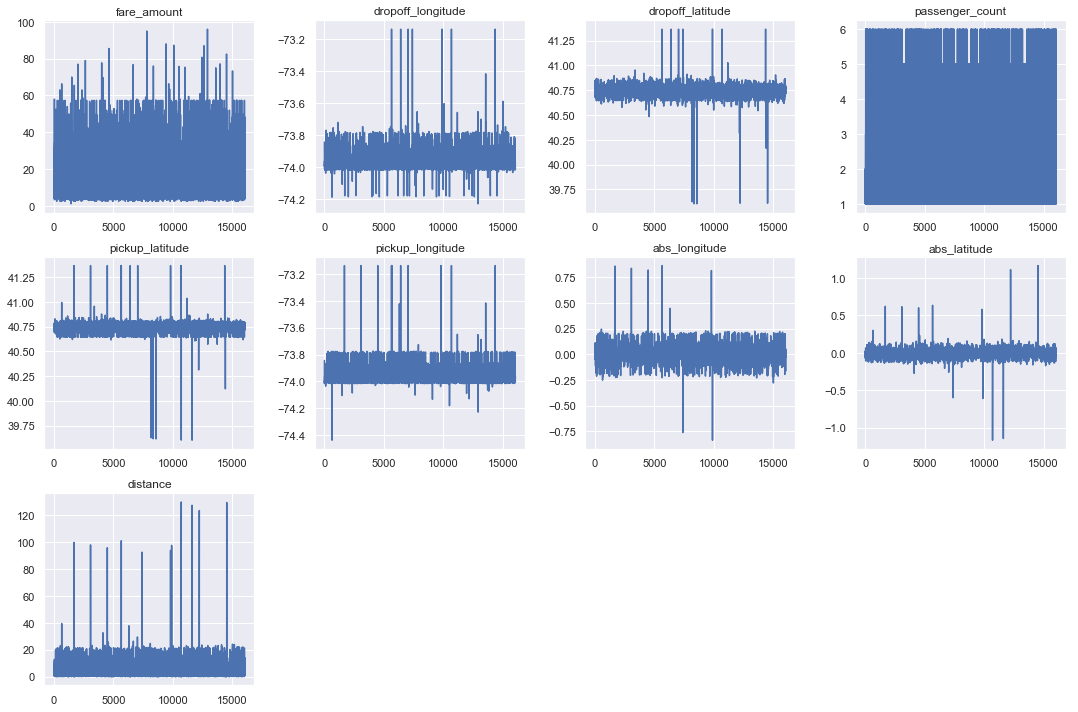

In [261]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 15
fig_size[1] = 10

plt.subplot(3,4,1)
plt.plot(cabfare_train['fare_amount'])
plt.title('fare_amount')

plt.subplot(3,4,2)
plt.plot(cabfare_train['dropoff_longitude'])
plt.title('dropoff_longitude')

plt.subplot(3,4,3)
plt.plot(cabfare_train['dropoff_latitude'])
plt.title('dropoff_latitude')

plt.subplot(3,4,4)
plt.plot(cabfare_train['passenger_count'])
plt.title('passenger_count')

plt.subplot(3,4,5)
plt.plot(cabfare_train['pickup_latitude'])
plt.title('pickup_latitude')

plt.subplot(3,4,6)
plt.plot(cabfare_train['pickup_longitude'])
plt.title('pickup_longitude')

plt.subplot(3,4,7)
plt.plot(cabfare_train['abs_longitude'])
plt.title('abs_longitude')

plt.subplot(3,4,8)
plt.plot(cabfare_train['abs_latitude'])
plt.title('abs_latitude')

plt.subplot(3,4,9)
plt.plot(cabfare_train['distance'])
plt.title('distance')

plt.tight_layout()

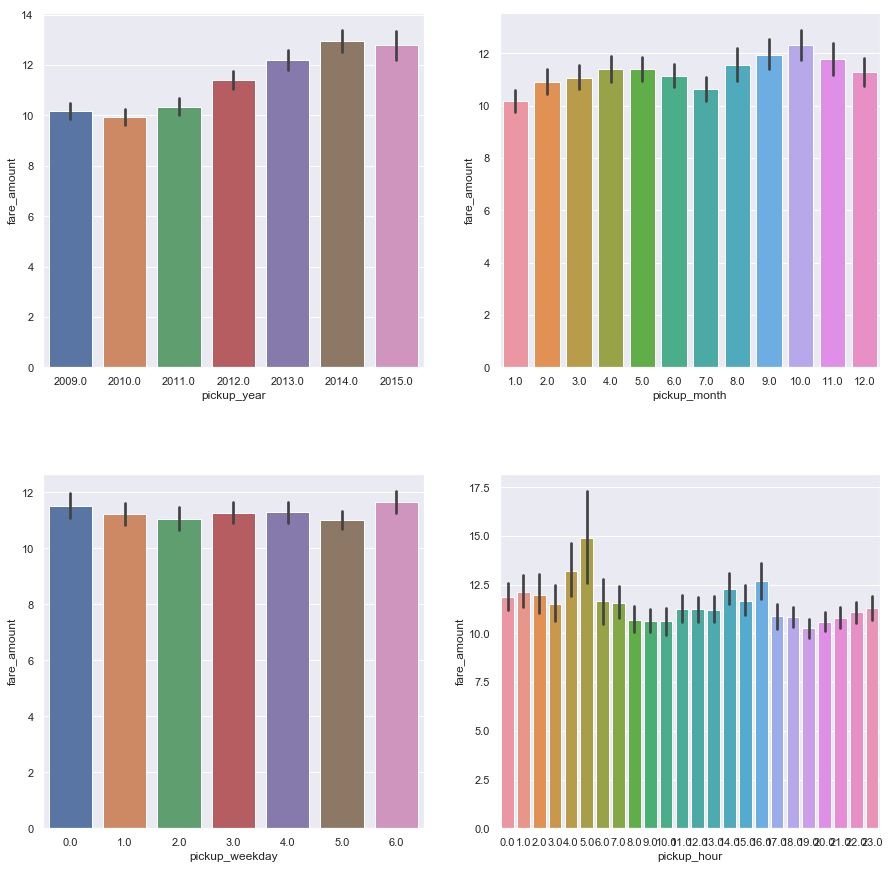

In [262]:
##################################################### Bi-variate Analysis##########################################
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='pickup_year',y='fare_amount',data=cabfare_train,ax=axarr[0][0])
sns.barplot(x='pickup_month',y='fare_amount',data=cabfare_train,ax=axarr[0][1])
sns.barplot(x='pickup_weekday',y='fare_amount',data=cabfare_train,ax=axarr[1][0])
sns.barplot(x='pickup_hour',y='fare_amount',data=cabfare_train,ax=axarr[1][1])

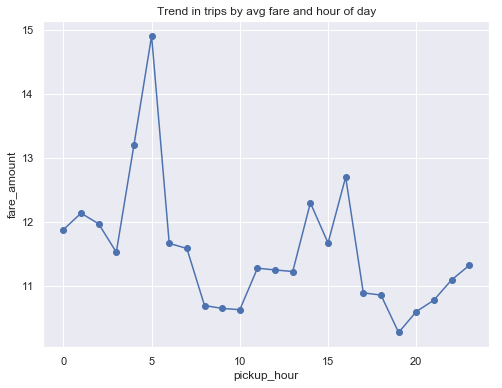

In [263]:
avg_fare_hr = cabfare_train.groupby("pickup_hour")["fare_amount"].mean().reset_index()
fig, ax = plt.subplots(figsize=(8,6))

plt.plot(avg_fare_hr["pickup_hour"],avg_fare_hr["fare_amount"],'-o')
ax.set(title = "Trend in trips by avg fare and hour of day",
                        xlabel = "pickup_hour",
                        ylabel = "fare_amount")
plt.savefig('Figure11.png')

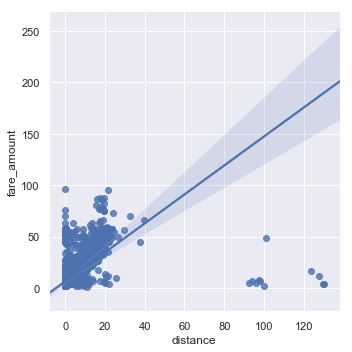

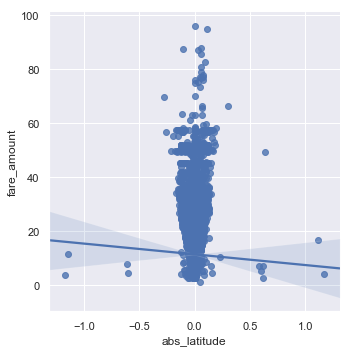

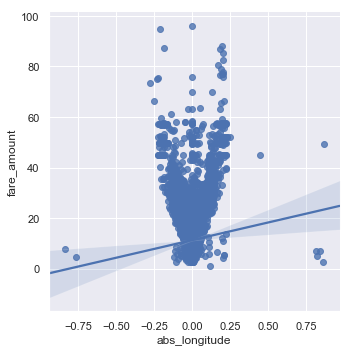

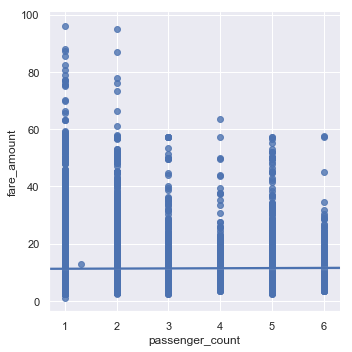

In [264]:
sns.lmplot(x='distance',y='fare_amount',data=cabfare_train)
sns.lmplot(x='abs_latitude',y='fare_amount',data=cabfare_train)
sns.lmplot(x='abs_longitude',y='fare_amount',data=cabfare_train)
sns.lmplot(x='passenger_count',y='fare_amount',data=cabfare_train)

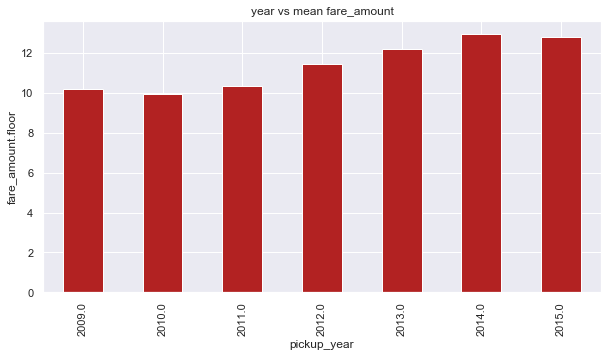

In [265]:
#Grouping mean fare_amount by year to check for any relationship in a bar plot
cabfare_train['fare_amount'] = cabfare_train.fare_amount.astype("float")
year = pd.pivot_table(cabfare_train, values = 'fare_amount', index = 'pickup_year', aggfunc = ['mean'])
fig, ax = plt.subplots(figsize = (10,5))
year.plot(kind = 'bar', legend = False, color = 'firebrick', ax = ax)
ax.set(title = 'year vs mean fare_amount', ylabel= 'fare_amount.floor')
plt.show()

In [266]:
cabfare_train.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
pickup_month         float64
pickup_year          float64
pickup_day           float64
pickup_weekday       float64
pickup_hour          float64
abs_latitude         float64
abs_longitude        float64
distance             float64
dtype: object

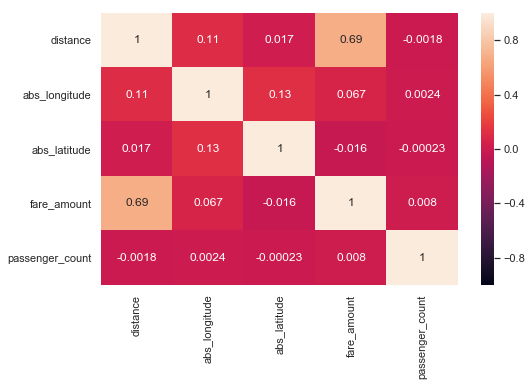

In [267]:
#CORRELATION ANALYSIS
sns.set(rc={'figure.figsize':(8,5)})

cabfare_train['passenger_count'] = cabfare_train['passenger_count'].astype(int)
colname = ['distance','abs_longitude','abs_latitude','fare_amount','passenger_count']
heat_map = cabfare_train[colname]
sns.heatmap(heat_map.corr(), vmin=-1.00, vmax=1.00, annot=True)

In [268]:
cabfare_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_latitude,abs_longitude,distance
count,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000,15565.000000,15564.000000,15564.000000,15564.000000,15564.000000,15564.000000,15565.000000,15565.000000,15565.000000
mean,11.278079,-73.974805,40.750927,-73.973839,40.751391,1.650434,6.268825,2011.733488,15.670843,3.033346,13.500386,-0.000464,-0.000966,3.406886
std,9.378806,0.041292,0.037904,0.039117,0.039519,1.265942,3.447379,1.869214,8.685036,1.970249,6.507697,0.038542,0.044729,4.577316
min,1.140000,-74.438233,39.603178,-74.227047,39.604972,1.000000,1.000000,2009.000000,1.000000,0.000000,0.000000,-1.168673,-0.836968,0.000000
25%,6.000000,-73.992372,40.736589,-73.991369,40.736333,1.000000,3.000000,2010.000000,8.000000,1.000000,9.000000,-0.014443,-0.013800,1.257896
50%,8.500000,-73.982050,40.753364,-73.980566,40.754242,1.000000,6.000000,2012.000000,16.000000,3.000000,14.000000,0.000000,-0.000967,2.171717
75%,12.500000,-73.968092,40.767807,-73.965401,40.768315,2.000000,9.000000,2013.000000,23.000000,5.000000,19.000000,0.014092,0.011719,3.899088
max,96.000000,-73.137393,41.366138,-73.137393,41.366138,6.000000,12.000000,2015.000000,31.000000,6.000000,23.000000,1.165157,0.863547,129.950482


In [269]:
cabfare_train = cabfare_train[cabfare_train["distance"] < 100]
cabfare_train = cabfare_train[cabfare_train["distance"] > 0]

In [270]:
cabfare_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_latitude,abs_longitude,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6.0,2009.0,15.0,0.0,17.0,0.009041,-0.002701,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1.0,2010.0,5.0,1.0,16.0,-0.070701,-0.036780,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8.0,2011.0,18.0,3.0,0.0,0.010708,0.008504,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4.0,2012.0,21.0,5.0,4.0,-0.024949,0.004437,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3.0,2010.0,9.0,1.0,7.0,-0.015754,-0.011440,1.999157


Text(0, 0.5, 'Importance')

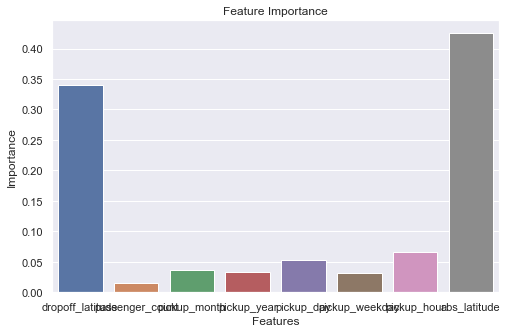

In [274]:
#Feature importance plotting
from sklearn.ensemble import RandomForestRegressor

names=list(cabfare_train)
names = names[4:12]

fea = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(cabfare_train.iloc[:,4:12],cabfare_train.iloc[:,12])

sns.barplot(x = names ,y = fea.feature_importances_)  

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

# MODELLING

In [275]:
#********************************** Modeling *****************************************************************
from sklearn import metrics
#function to check performance  
def performance(actual, predict):
    print('MSE:', metrics.mean_squared_error(actual, predict)) 
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predict))) 
    print('MAPE:',np.mean(np.abs((actual-predict)/actual))*100)
    print('R-Sq:', metrics.r2_score(actual, predict))

In [272]:
print(np.any(np.isnan(X_train)))
print(np.all(np.isfinite(X_train)))

False
True


In [273]:
cabfare_train =cabfare_train[~cabfare_train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [276]:
#1. ############################################ Linear Regression ############################
###Model 1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
y = cabfare_train.fare_amount
X = cabfare_train.drop(['fare_amount'],axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

model= LinearRegression()
model.fit(X_train,y_train)
linear_prediction = model.predict(X_test)


In [277]:
from sklearn.metrics import mean_squared_error, r2_score
print('Root Mean Squared Error: ' + str(mean_squared_error(y_test, linear_prediction) ** 0.5))

Root Mean Squared Error: 6.092458883292712


In [278]:
performance(y_test,linear_prediction)

MSE: 37.11805524461228
RMSE: 6.092458883292712
MAPE: 26.982905058315783
R-Sq: 0.5734271490089067


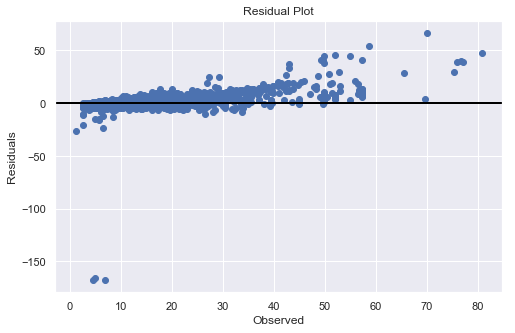

In [279]:
#Residual Plot
residuals = y_test-linear_prediction
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure14.png')
plt.show()

In [280]:
model.score(X_train,y_train)

0.6742933194611569

In [297]:
df_copy = cabfare_train

In [282]:
df_copy.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_latitude,abs_longitude,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6.0,2009.0,15.0,0.0,17.0,0.009041,-0.002701,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1.0,2010.0,5.0,1.0,16.0,-0.070701,-0.036780,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8.0,2011.0,18.0,3.0,0.0,0.010708,0.008504,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4.0,2012.0,21.0,5.0,4.0,-0.024949,0.004437,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3.0,2010.0,9.0,1.0,7.0,-0.015754,-0.011440,1.999157


In [283]:
#2. ############################################ Decision Tree Model ############################
###Model 2

y = df_copy.fare_amount
X = df_copy.drop(['fare_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)


In [284]:
from sklearn.tree import DecisionTreeRegressor
model2= DecisionTreeRegressor(max_depth = 10)
model2.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [285]:
Decisiontree_prediction = model2.predict(X_test)

In [286]:
print('Root Mean Square Error: ' + str(mean_squared_error(y_test, Decisiontree_prediction) ** 0.5))

Root Mean Square Error: 4.620749769415206


In [287]:
performance(y_test,Decisiontree_prediction)

MSE: 21.35132843155068
RMSE: 4.620749769415206
MAPE: 20.068949496813048
R-Sq: 0.7640780103803966


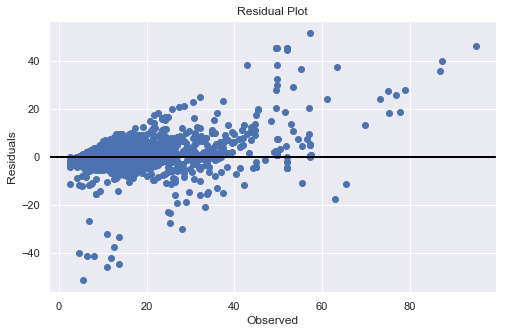

In [288]:
#Residual Plot
residuals = y_test-Decisiontree_prediction
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure14.png')
plt.show()

In [289]:
model2.score(X_train,y_train)

0.9369300351031598

In [298]:
#3. ############################################ RandomForest Regressor ############################
###Model 3
y = df_copy.fare_amount
X = df_copy.drop(['fare_amount'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)


In [299]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
model3= RandomForestRegressor(max_depth=10)
model3.fit(X_train,y_train)

E:\Datascience\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [300]:
RandomForest_prediction = model3.predict(X_test)

In [301]:
print('Root Mean Square Error: ' + str(mean_squared_error(y_test, RandomForest_prediction) ** 0.5))

Root Mean Square Error: 4.077968422677904


In [302]:
performance(y_test,RandomForest_prediction)

MSE: 16.62982645635811
RMSE: 4.077968422677904
MAPE: 19.40965316563765
R-Sq: 0.8162483539518208


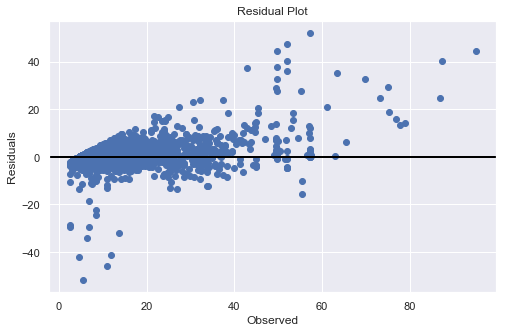

In [303]:
#Residual Plot
residuals = y_test-RandomForest_prediction
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure14.png')
plt.show()

In [304]:
model3.score(X_train,y_train)

0.9303230500204894

In [ ]:
##4. ############################################ Ridge Regression ############################
###Model 4 

In [305]:
from sklearn.linear_model import LinearRegression
y = cabfare_train.fare_amount
X = cabfare_train.drop(['fare_amount'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)

In [306]:
from sklearn import linear_model
model4 = linear_model.Ridge(alpha=.5).fit(X_train,y_train)
Ridge_prediction = model.predict(X_test)

#error matrix
performance(y_test,Ridge_prediction)


MSE: 28.158125495113428
RMSE: 5.306423041476568
MAPE: 25.623689677285654
R-Sq: 0.6888661512531858


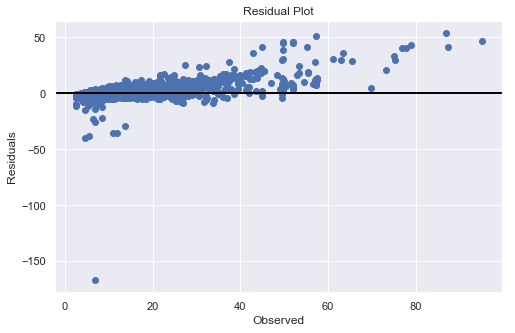

In [307]:
#Residual Plot
residuals = y_test-Ridge_prediction
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot')
plt.savefig('Figure14.png')
plt.show()

In [308]:
model4.score(X_train,y_train)

0.6304549315067344

Text(0, 0.5, 'Predicted values')

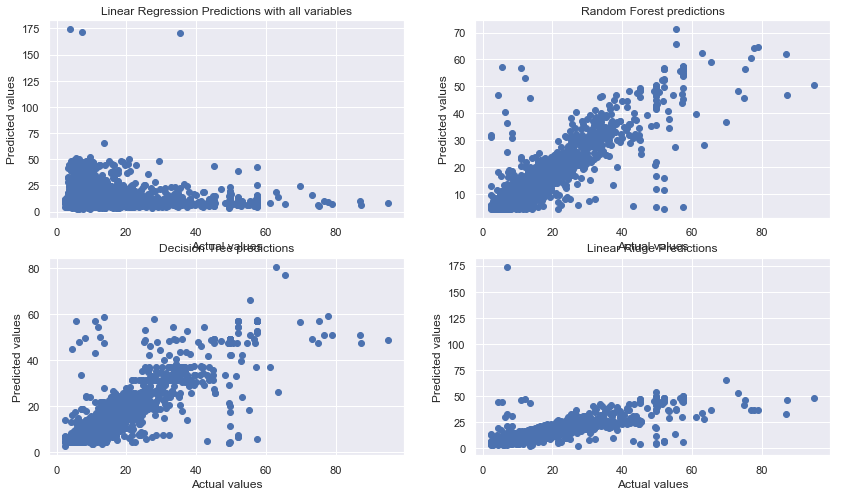

In [309]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.title('Linear Regression Predictions with all variables')
plt.scatter(y_test,linear_prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,3)
plt.title('Decision Tree predictions')
plt.scatter(y_test,Decisiontree_prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,2)
plt.title('Random Forest predictions')
plt.scatter(y_test,RandomForest_prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,4)
plt.title('Linear Ridge Predictions')
plt.scatter(y_test,Ridge_prediction)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')



# IMPLEMENTATION ON TEST DATASET

In [310]:
cabfare_test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [311]:
cabfare_test.shape

(9914, 6)

In [312]:
#Stripping the pickup_datetime variable into year,month,day,hours,weekday
cabfare_test['pickup_datetime'] = pd.to_datetime(cabfare_test['pickup_datetime'],format='%Y-%m-%d %H:%M:%S %Z',
                                               errors='coerce')


In [313]:
cabfare_test['pickup_month'] = cabfare_test['pickup_datetime'].dt.month
cabfare_test['pickup_year'] = cabfare_test['pickup_datetime'].dt.year
cabfare_test['pickup_day'] = cabfare_test['pickup_datetime'].dt.day
cabfare_test['pickup_weekday'] = cabfare_test['pickup_datetime'].dt.weekday
cabfare_test['pickup_hour'] = cabfare_test['pickup_datetime'].dt.hour

In [314]:
cabfare_test = cabfare_test.drop('pickup_datetime',axis = 1)

In [315]:
cabfare_test.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour
0,-73.973320,40.763805,-73.981430,40.743835,1,1,2015,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,1,2015,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,10,2011,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,12,2012,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,12,2012,1,5,21


In [316]:
cabfare_test['abs_longitude']=abs(cabfare_test['pickup_longitude']-cabfare_test['dropoff_longitude'])
cabfare_test['abs_latitude']=abs(cabfare_test['pickup_latitude']-cabfare_test['dropoff_latitude'])

In [317]:
cabfare_test['distance'] = great_circle_distance(cabfare_test.pickup_latitude,cabfare_test.pickup_longitude,cabfare_test.dropoff_latitude,cabfare_test.dropoff_longitude)

In [318]:
cabfare_test.head(10)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_longitude,abs_latitude,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,1,2015,27,1,13,0.008110,0.019970,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,1,2015,27,1,13,0.012024,0.019817,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,10,2011,8,5,11,0.002870,0.005121,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,12,2012,1,5,21,0.009288,0.016172,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,12,2012,1,5,21,0.022519,0.045348,5.387301
5,-73.960983,40.765547,-73.979177,40.740053,1,12,2012,1,5,21,0.018194,0.025494,3.222549
6,-73.949013,40.773204,-73.959622,40.770893,1,10,2011,6,3,12,0.010609,0.002311,0.929601
7,-73.777282,40.646636,-73.985083,40.759368,1,10,2011,6,3,12,0.207801,0.112732,21.540102
8,-74.014099,40.709638,-73.995106,40.741365,1,10,2011,6,3,12,0.018993,0.031727,3.873962
9,-73.969582,40.765519,-73.980686,40.770725,1,2,2014,18,1,15,0.011104,0.005206,1.099794


In [319]:
cabfare_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_longitude,abs_latitude,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,6.857979,2011.815816,16.194170,2.852834,13.467420,0.023348,0.022133,3.435371
std,0.042774,0.033541,0.039072,0.035435,1.278747,3.353272,1.803347,8.838482,1.994451,6.868584,0.036719,0.025589,3.972374
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,4.000000,2010.000000,9.000000,1.000000,8.000000,0.006354,0.007279,1.298277
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,7.000000,2012.000000,16.000000,3.000000,15.000000,0.013123,0.014715,2.217412
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,10.000000,2014.000000,25.000000,5.000000,19.000000,0.024557,0.028261,4.045302
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,12.000000,2015.000000,31.000000,6.000000,23.000000,0.849168,0.633213,99.996040


In [143]:
cabfare_test = cabfare_test.drop(['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'], axis=1)

In [320]:
cabfare_test.head(10)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_longitude,abs_latitude,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,1,2015,27,1,13,0.008110,0.019970,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,1,2015,27,1,13,0.012024,0.019817,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,10,2011,8,5,11,0.002870,0.005121,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,12,2012,1,5,21,0.009288,0.016172,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,12,2012,1,5,21,0.022519,0.045348,5.387301
5,-73.960983,40.765547,-73.979177,40.740053,1,12,2012,1,5,21,0.018194,0.025494,3.222549
6,-73.949013,40.773204,-73.959622,40.770893,1,10,2011,6,3,12,0.010609,0.002311,0.929601
7,-73.777282,40.646636,-73.985083,40.759368,1,10,2011,6,3,12,0.207801,0.112732,21.540102
8,-74.014099,40.709638,-73.995106,40.741365,1,10,2011,6,3,12,0.018993,0.031727,3.873962
9,-73.969582,40.765519,-73.980686,40.770725,1,2,2014,18,1,15,0.011104,0.005206,1.099794


In [321]:
#Applying the Random forest model for the test data 
RandomForest_predict = RandomForestRegressor(n_estimators = 100, random_state = 127).fit(X_train,y_train)
fare_amount = RandomForest_predict.predict(cabfare_test)

cabfare_test['fare_amount'] = fare_amount

In [322]:
cabfare_test.head(10)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_month,pickup_year,pickup_day,pickup_weekday,pickup_hour,abs_longitude,abs_latitude,distance,fare_amount
0,-73.973320,40.763805,-73.981430,40.743835,1,1,2015,27,1,13,0.008110,0.019970,2.323259,10.6870
1,-73.986862,40.719383,-73.998886,40.739201,1,1,2015,27,1,13,0.012024,0.019817,2.425353,10.9100
2,-73.982524,40.751260,-73.979654,40.746139,1,10,2011,8,5,11,0.002870,0.005121,0.618628,4.0780
3,-73.981160,40.767807,-73.990448,40.751635,1,12,2012,1,5,21,0.009288,0.016172,1.961033,8.8160
4,-73.966046,40.789775,-73.988565,40.744427,1,12,2012,1,5,21,0.022519,0.045348,5.387301,17.1677
5,-73.960983,40.765547,-73.979177,40.740053,1,12,2012,1,5,21,0.018194,0.025494,3.222549,10.4820
6,-73.949013,40.773204,-73.959622,40.770893,1,10,2011,6,3,12,0.010609,0.002311,0.929601,5.1970
7,-73.777282,40.646636,-73.985083,40.759368,1,10,2011,6,3,12,0.207801,0.112732,21.540102,44.6970
8,-74.014099,40.709638,-73.995106,40.741365,1,10,2011,6,3,12,0.018993,0.031727,3.873962,12.4570
9,-73.969582,40.765519,-73.980686,40.770725,1,2,2014,18,1,15,0.011104,0.005206,1.099794,7.0110


In [323]:
cabfare_test.to_csv("CabFare_Predicted.csv")

Text(0.5, 1.0, 'fare_amount')

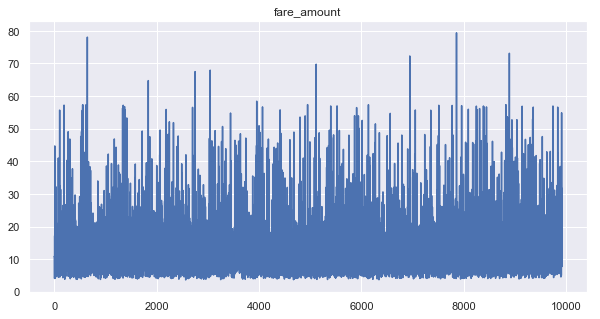

In [324]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 10
fig_size[1] = 5
plt.plot(cabfare_test['fare_amount'])
plt.title('fare_amount')

In [ ]:
######################################END######################################################